In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[9]

[1,
 56,
 7224,
 81,
 40,
 1175,
 174,
 2,
 6,
 1793,
 10,
 266,
 3315,
 5,
 1574,
 799,
 317,
 65,
 136,
 277,
 801,
 7,
 429,
 65,
 182,
 199,
 8,
 174,
 201,
 2540,
 10,
 1806,
 5,
 401,
 20,
 1574,
 799,
 6,
 119,
 20,
 1574,
 1075,
 136,
 10,
 277,
 498,
 120,
 31,
 7224,
 13,
 251,
 18,
 428,
 90,
 289,
 4,
 199,
 8,
 4,
 5880,
 1806,
 23,
 124,
 20,
 799,
 317,
 6,
 482,
 20,
 1075,
 174,
 287,
 13,
 799,
 317,
 65,
 40,
 333,
 1398,
 224,
 4,
 137,
 130,
 2,
 356,
 8181,
 2,
 172,
 4,
 1150,
 3727,
 403,
 54,
 139,
 3045,
 692,
 31,
 6473,
 5,
 799,
 1306,
 9,
 2,
 2735,
 17,
 12]

In [6]:
word_index = reuters.get_word_index() 
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[9]])

565248/550378 [==============================] - 0s 0us/step


In [7]:
decoded_newswire

'? lt aramco corp has accepted japanese ? to lift a higher proportion of arab heavy crude oil under term contracts in july oil industry sources said japanese companies requested a ratio of 80 pct arab heavy to 20 pct arab light under a term contract agreement with aramco for 100 000 barrels per day the sources said the contractual ratio is 30 pct heavy crude to 70 pct light japanese demand for heavy crude oil has increased substantially since the all japan ? union ceased ? into the northern mideast gulf last month causing problems with liftings of heavy kuwait and ? crudes reuter 3'

In [12]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results


In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results


In [14]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [16]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 64ms/step - loss: 2.6211 - accuracy: 0.5417 - val_loss: 1.6953 - val_accuracy: 0.6480
Epoch 2/20
16/16 [==============================] - 1s 41ms/step - loss: 1.4004 - accuracy: 0.7088 - val_loss: 1.2730 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 1s 41ms/step - loss: 1.0354 - accuracy: 0.7777 - val_loss: 1.1018 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 1s 41ms/step - loss: 0.8132 - accuracy: 0.8332 - val_loss: 0.9902 - val_accuracy: 0.7930
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.6439 - accuracy: 0.8678 - val_loss: 0.9147 - val_accuracy: 0.8170
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5066 - accuracy: 0.8948 - val_loss: 0.8843 - val_accuracy: 0.8170
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 0.4055 - accuracy: 0.9169 - val_loss: 0.8521 - val_accuracy: 0.8240
Epoch 8/20
16

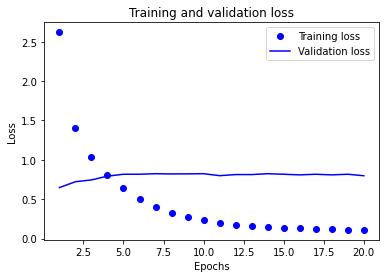

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

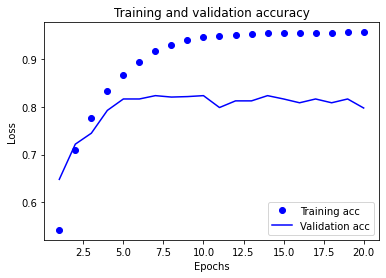

In [23]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 52ms/step - loss: 2.6584 - accuracy: 0.5329 - val_loss: 1.7338 - val_accuracy: 0.6530
Epoch 2/9
16/16 [==============================] - 1s 41ms/step - loss: 1.4230 - accuracy: 0.7091 - val_loss: 1.2962 - val_accuracy: 0.7080
Epoch 3/9
16/16 [==============================] - 1s 41ms/step - loss: 1.0415 - accuracy: 0.7767 - val_loss: 1.1209 - val_accuracy: 0.7580
Epoch 4/9
16/16 [==============================] - 1s 42ms/step - loss: 0.8117 - accuracy: 0.8304 - val_loss: 1.0333 - val_accuracy: 0.7890
Epoch 5/9
16/16 [==============================] - 1s 42ms/step - loss: 0.6438 - accuracy: 0.8685 - val_loss: 0.9658 - val_accuracy: 0.7960
Epoch 6/9
16/16 [==============================] - 1s 41ms/step - loss: 0.5146 - accuracy: 0.8968 - val_loss: 0.9186 - val_accuracy: 0.8100
Epoch 7/9
16/16 [==============================] - 1s 41ms/step - loss: 0.4144 - accuracy: 0.9162 - val_loss: 0.9275 - val_accuracy: 0.7970
Epoch 8/9
16/16 [===

In [25]:
results

[0.9911871552467346, 0.7911843061447144]

In [28]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.18833481745325023

In [29]:
predictions = model.predict(x_test)

In [30]:
predictions[0].shape

(46,)

In [31]:
np.sum(predictions[0])

1.0

In [32]:
np.argmax(predictions[0])

3

In [34]:
predictions[0]

array([8.57534687e-05, 3.69107474e-05, 6.13284737e-06, 8.56258273e-01,
       1.34979382e-01, 2.01975308e-05, 5.07427239e-06, 1.46694088e-04,
       1.14205875e-03, 4.95128415e-06, 2.25215972e-05, 6.55477401e-04,
       3.36458470e-04, 5.78667532e-05, 7.74913860e-05, 5.54798171e-05,
       4.15406743e-04, 3.44504988e-05, 3.61784696e-05, 4.52347798e-04,
       1.82469923e-03, 1.18260694e-04, 7.53132917e-05, 1.79170645e-04,
       1.74676472e-06, 6.74816911e-05, 4.89873344e-07, 1.29143242e-04,
       6.48501009e-05, 1.32115805e-04, 1.11319845e-04, 3.12250369e-04,
       6.21400759e-05, 1.76521171e-05, 9.88428830e-04, 1.12752141e-05,
       3.21164989e-04, 2.10943435e-05, 7.71837131e-06, 4.09853354e-04,
       2.30296191e-05, 2.29143086e-04, 2.58793425e-05, 2.60079014e-05,
       7.94527841e-06, 2.77595177e-06], dtype=float32)

In [37]:
train_labels[0]

3

In [38]:
np.array(test_labels[0])

array(3)

In [39]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

# Model with information bottleneck

In [40]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 16ms/step - loss: 2.8280 - accuracy: 0.3572 - val_loss: 2.2740 - val_accuracy: 0.3690
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 1.9399 - accuracy: 0.4425 - val_loss: 1.6756 - val_accuracy: 0.5700
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 1.4631 - accuracy: 0.5980 - val_loss: 1.4653 - val_accuracy: 0.6070
Epoch 4/20
63/63 [==============================] - 1s 15ms/step - loss: 1.2218 - accuracy: 0.6733 - val_loss: 1.3557 - val_accuracy: 0.6610
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0622 - accuracy: 0.7238 - val_loss: 1.3228 - val_accuracy: 0.6850
Epoch 6/20
63/63 [==============================] - 1s 15ms/step - loss: 0.9479 - accuracy: 0.7591 - val_loss: 1.2980 - val_accuracy: 0.7030
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 0.8607 - accuracy: 0.7767 - val_loss: 1.3034 - val_accuracy: 0.6980
Epoch 8/20
63

In [56]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

results = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 17ms/step - loss: 1.8773 - accuracy: 0.6397 - val_loss: 1.2217 - val_accuracy: 0.7280
Epoch 2/20
63/63 [==============================] - 1s 15ms/step - loss: 0.9390 - accuracy: 0.8022 - val_loss: 0.9872 - val_accuracy: 0.7960
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 0.6349 - accuracy: 0.8720 - val_loss: 0.8878 - val_accuracy: 0.8180
Epoch 4/20
63/63 [==============================] - 1s 15ms/step - loss: 0.4529 - accuracy: 0.9077 - val_loss: 0.8347 - val_accuracy: 0.8230
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 0.3366 - accuracy: 0.9278 - val_loss: 0.8257 - val_accuracy: 0.8200
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 0.2635 - accuracy: 0.9404 - val_loss: 0.8220 - val_accuracy: 0.8270
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 0.2154 - accuracy: 0.9468 - val_loss: 0.8662 - val_accuracy: 0.8200
Epoch 8/20
63

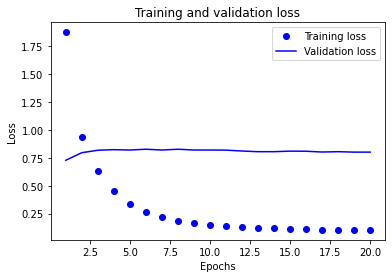

In [57]:
import matplotlib.pyplot as plt

loss = results.history['loss']
val_loss = results.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

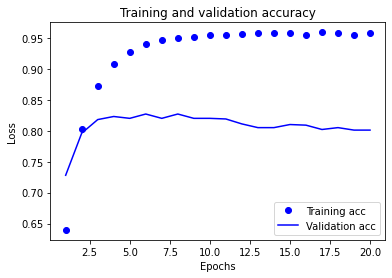

In [58]:
plt.clf()

acc = results.history['accuracy']
val_acc = results.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [59]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

results = model.fit(partial_x_train,
          partial_y_train,
          epochs=7,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/7
63/63 [==============================] - 2s 26ms/step - loss: 1.7349 - accuracy: 0.6337 - val_loss: 1.1832 - val_accuracy: 0.7210
Epoch 2/7
63/63 [==============================] - 2s 24ms/step - loss: 0.8710 - accuracy: 0.8031 - val_loss: 1.0215 - val_accuracy: 0.7730
Epoch 3/7
63/63 [==============================] - 2s 24ms/step - loss: 0.5617 - accuracy: 0.8780 - val_loss: 0.9070 - val_accuracy: 0.8120
Epoch 4/7
63/63 [==============================] - 2s 24ms/step - loss: 0.3731 - accuracy: 0.9176 - val_loss: 0.9436 - val_accuracy: 0.8100
Epoch 5/7
63/63 [==============================] - 2s 24ms/step - loss: 0.2770 - accuracy: 0.9390 - val_loss: 1.0246 - val_accuracy: 0.8000
Epoch 6/7
63/63 [==============================] - 2s 24ms/step - loss: 0.2200 - accuracy: 0.9475 - val_loss: 1.0083 - val_accuracy: 0.8070
Epoch 7/7
63/63 [==============================] - 1s 24ms/step - loss: 0.1930 - accuracy: 0.9509 - val_loss: 1.2162 - val_accuracy: 0.7750


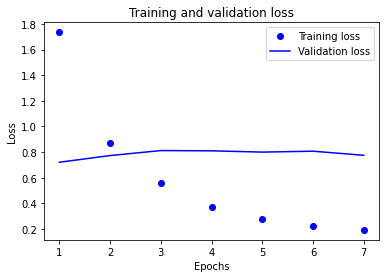

In [60]:
import matplotlib.pyplot as plt

loss = results.history['loss']
val_loss = results.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

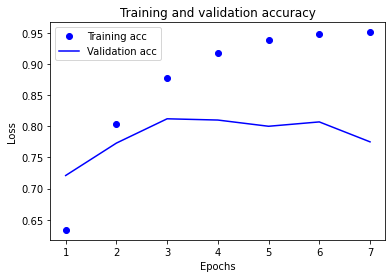

In [61]:
plt.clf()

acc = results.history['accuracy']
val_acc = results.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()